<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-2-Kaggle-Challenge/blob/master/module1/Jerimiah_Willhite_assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

print(train.shape, test.shape)
train.head()

(59400, 41) (14358, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [0]:
 #Do train/validate/test split with the Tanzania Waterpumps data.
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
#Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, what other columns have zeros and shouldn't? What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
import numpy as np

def wrangle(X):
    X = X.copy()
    X['latitude'] = X['latitude'].replace(-2e-08, 0)

    cols_with_zeroes = ['longitude', 'latitude']
    for col in cols_with_zeroes:
        X[col] = X[col].replace(0, np.nan)

    X = X.drop(columns='quantity_group')

    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)


In [0]:
#breaking up the data:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
#categorical_features = cardinality[cardinality <= 50].index.tolist()
categorical_features = ['public_meeting', 'management',
                        'scheme_management', 'payment', 'quantity', 'extraction_type',
                        'payment_type', 'waterpoint_type', 'extraction_type_class', 'water_quality',
                        'source_class', 'source_type', 'basin', 'region', 'permit']

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'public_meeting', 'management', 'scheme_management', 'payment', 'quantity', 'extraction_type', 'payment_type', 'waterpoint_type', 'extraction_type_class', 'water_quality', 'source_class', 'source_type', 'basin', 'region', 'permit']


In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
#let's make some pipelines!
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logistic_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)
logistic_pipeline.fit(X_train, y_train)


print('Validation Accuracy', logistic_pipeline.score(X_val, y_val))

y_pred = logistic_pipeline.predict(X_test)


Validation Accuracy 0.7308922558922559


In [0]:
#Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
#selecting location with logistic regression for baseline

train_location = X_train[['latitude', 'longitude']].copy()
val_location = X_val[['latitude', 'longitude']].copy()

logistic_location = make_pipeline(
    SimpleImputer(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

logistic_location.fit(train_location, y_train)

print('Training accuracy: ', logistic_location.score(train_location, y_train))
print('Validation accuracy: ', logistic_location.score(val_location, y_val))

Training accuracy:  0.5430765993265994
Validation accuracy:  0.5430976430976431


In [0]:
#then fitting to a decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dt = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=15, random_state=42)
)

dt.fit(X_train, y_train)

print('Training accuracy: ', dt.score(X_train, y_train))
print('Validation accuracy: ', dt.score(X_val, y_val))

Training accuracy:  0.8320286195286195
Validation accuracy:  0.7674242424242425


In [0]:
#Get your validation accuracy score.


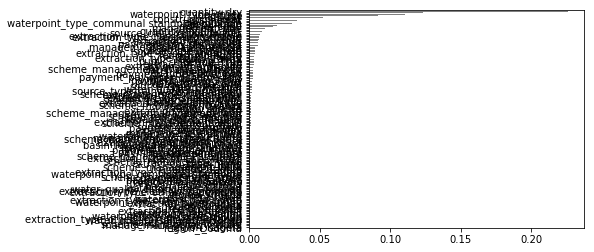

In [0]:
#Get and plot your feature importances.
%matplotlib inline
import matplotlib.pyplot as plt

model = dt.named_steps['decisiontreeclassifier']
encoder = dt.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
importances.sort_values().plot.barh(color='grey')

In [0]:
#Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue Submit Predictions button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
#Commit your notebook to your fork of the GitHub repo.

In [0]:
#try random forest with this cleanish data
from sklearn.ensemble import RandomForestClassifier


rm = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, max_depth=20, criterion='entropy', random_state=42)
)

rm.fit(X_train, y_train)

print('Training accuracy: ', rm.score(X_train, y_train))
print('Validation accuracy: ', rm.score(X_val, y_val))

Training accuracy:  0.962773569023569
Validation accuracy:  0.8090909090909091


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gb = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier(n_estimators=100)
)

gb.fit(X_train, y_train)

print('Training accuracy: ', gb.score(X_train, y_train))
print('Validation accuracy: ', gb.score(X_val, y_val))

Training accuracy:  0.7529250841750842
Validation accuracy:  0.7475589225589225


In [0]:
from sklearn.ensemble import BaggingClassifier

bag = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    BaggingClassifier(n_estimators=100, random_state=42)
)

bag.fit(X_train, y_train)

print('Training accuracy: ', bag.score(X_train, y_train))
print('Validation accuracy: ', bag.score(X_val, y_val))

Training accuracy:  0.9954545454545455
Validation accuracy:  0.8025252525252525


In [0]:
from sklearn.ensemble import BaggingClassifier

bag = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    BaggingClassifier(n_estimators=100, random_state=42)
)

bag.fit(X_train, y_train)

print('Training accuracy: ', bag.score(X_train, y_train))
print('Validation accuracy: ', bag.score(X_val, y_val))

Training accuracy:  0.9954335016835016
Validation accuracy:  0.8036195286195286


In [0]:
from sklearn.ensemble import ExtraTreesClassifier

et = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    ExtraTreesClassifier(n_estimators=100, max_depth=20, random_state=42)
)

et.fit(X_train, y_train)

print('Training accuracy: ', et.score(X_train, y_train))
print('Validation accuracy: ', et.score(X_val, y_val))

Training accuracy:  0.9237373737373737
Validation accuracy:  0.796969696969697


In [0]:
from sklearn.ensemble import ExtraTreesClassifier

et = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    ExtraTreesClassifier(n_estimators=100, max_depth=20, random_state=42)
)

et.fit(X_train, y_train)

print('Training accuracy: ', et.score(X_train, y_train))
print('Validation accuracy: ', et.score(X_val, y_val))

Training accuracy:  0.8955808080808081
Validation accuracy:  0.7958754208754208


In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                          random_state=42)
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = GaussianNB()

vc = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
)

vc.fit(X_train, y_train)

print('Training accuracy: ', vc.score(X_train, y_train))
print('Validation accuracy: ', vc.score(X_val, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



Training accuracy:  0.7660563973063973
Validation accuracy:  0.6994949494949495


In [0]:
from sklearn.ensemble import VotingClassifier

icv = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
)

vc.fit(X_train, y_train)

print('Training accuracy: ', vc.score(X_train, y_train))
print('Validation accuracy: ', vc.score(X_val, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



Training accuracy:  0.7660563973063973
Validation accuracy:  0.6994949494949495


In [0]:


y_pred = rm.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission_06.csv', index=False)
if in_colab:
  from google.colab import files
  files.download('submission_06.csv')